# Olynpics

目標：夏のオリンピック競技と冬のオリンピック競技の金メダリストの所属の国を調べて、夏と冬の金メダリストの国の系統からどのような国や地域が強いかを分析する

In [3]:
import pandas as pd

df = pd.read_csv("olympics.csv")

df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
seasons = ["Summer", "Winter"]

for season in seasons:
    gold_countries = df[
        (df["Season"] == season) &
        (df["Medal"] == "Gold")
    ]["Team"].unique()

    print(f"\n{season} Olympics 金メダリストの国:")
    for country in gold_countries:
        print(country)


Summer Olympics 金メダリストの国:
Denmark/Sweden
Finland
Norway
Taifun
France
Belarus
Cameroon
Spain
Italy
United States
Pakistan
Soviet Union
Uzbekistan
Azerbaijan
Unified Team
Vesper Boat Club
Ethiopia
Bulgaria
Hungary
Great Britain
Jordan
Sweden
New Zealand
Argentina
Germany
Brazil
France-1
Romania
Netherlands
Large boat, Central Naval Prep School "Poros"-1
Cuba
Indonesia-1
East Germany
Japan
Australia
Union des Socits Franais de Sports Athletiques
Ukraine
Nigeria
Turkey
Bissbi
Russia
Uganda
Individual Olympic Athletes
United Arab Emirates
Denmark
Switzerland
Lithuania
Armenia
Serbia
India
Greece
Brazil-1
Belgium
Austria
Heira II
Nykjbings paa Falster
East Germany-1
Canada
South Korea
North Korea
Yugoslavia
Poland
Uruguay
Norna
Magda IX
Morocco
Mexico
Mosk II
Trinidad and Tobago
Ludwigshafener Ruderverein
Kazakhstan
Georgia
Kenya
Jamaica
Hera-1
Great Britain-1
South Africa
West Germany
Carabinier-15
England-1
Croatia
Pan
Australasia
London City Police-1
Luxembourg
Serbia and Montenegro
Dev

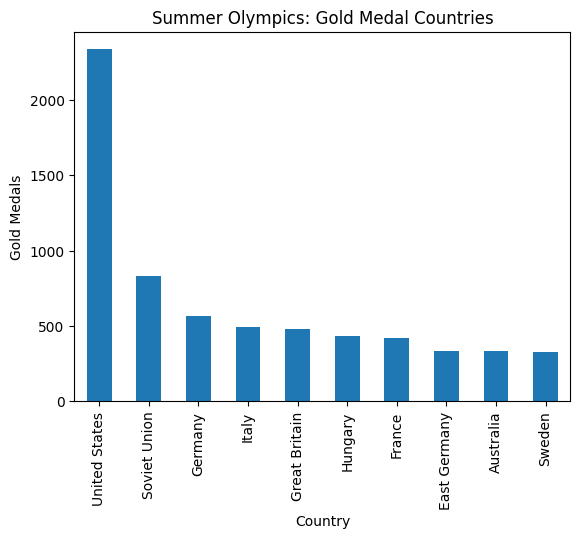

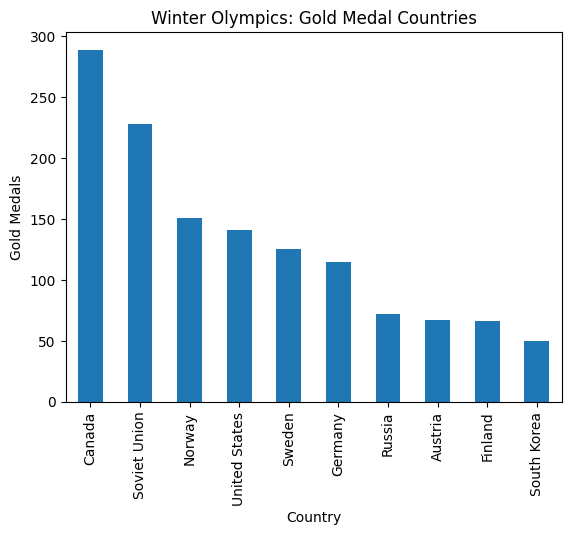

In [10]:
import matplotlib.pyplot as plt

gold_df = df[df["Medal"] == "Gold"]

for season in seasons:
    medal_count = (
        gold_df[gold_df["Season"] == season]
        .groupby("Team")
        .size()
        .sort_values(ascending=False)
        .head(10)   
    )


    plt.figure()
    medal_count.plot(kind="bar")
    plt.title(f"{season} Olympics: Gold Medal Countries")
    plt.xlabel("Country")
    plt.ylabel("Gold Medals")
    plt.show()

In [12]:
region_dict = {
    # ヨーロッパ
    "GER": "Europe", "FRA": "Europe", "GBR": "Europe",
    "ITA": "Europe", "ESP": "Europe", "NED": "Europe",
    "NOR": "Europe", "SWE": "Europe", "RUS": "Europe",

    # アジア
    "JPN": "Asia", "CHN": "Asia", "KOR": "Asia",
    "IND": "Asia",

    # 北米
    "USA": "North America", "CAN": "North America",

    # 南米
    "BRA": "South America", "ARG": "South America",

    # オセアニア
    "AUS": "Oceania", "NZL": "Oceania",

    # アフリカ
    "KEN": "Africa", "ETH": "Africa"
}



gold_df["Region"] = gold_df["NOC"].map(region_dict)
gold_df["Region"] = gold_df["Region"].fillna("Other")

for season in seasons:
    region_gold = (
        gold_df[gold_df["Season"] == season]
        .groupby("Region")
        .size()
        .sort_values(ascending=False)
    )

    print(f"\n{season} Olympics 地域別 金メダル数")
    print(region_gold)


Summer Olympics 地域別 金メダル数
Region
Other            3833
Europe           3442
North America    2630
Asia              866
Oceania           432
South America     200
Africa             56
dtype: int64

Winter Olympics 地域別 金メダル数
Region
Europe           701
Other            645
North America    471
Asia              90
Oceania            6
dtype: int64


C:\Users\yuto2\AppData\Local\Temp\ipykernel_8584\2457787473.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_df["Region"] = gold_df["NOC"].map(region_dict)
C:\Users\yuto2\AppData\Local\Temp\ipykernel_8584\2457787473.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_df["Region"] = gold_df["Region"].fillna("Other")


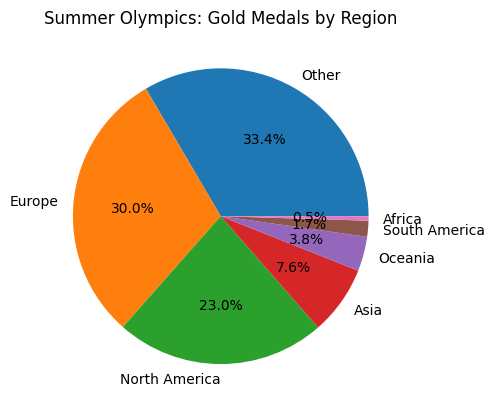

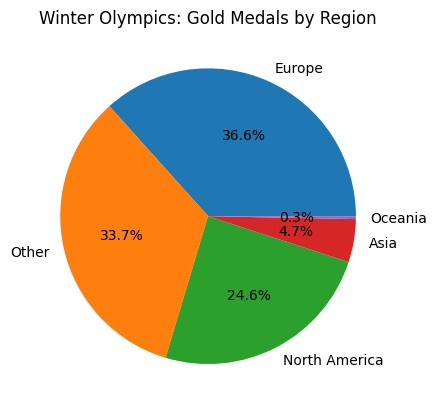

In [13]:
for season in seasons:
    region_gold = (
        gold_df[gold_df["Season"] == season]
        .groupby("Region")
        .size()
        .sort_values(ascending=False)
    )

    plt.figure()
    region_gold.plot(kind="pie", autopct="%1.1f%%")
    plt.title(f"{season} Olympics: Gold Medals by Region")
    plt.ylabel("")
    plt.show()


① 夏季と冬季で「強い地域」が違う理由

考えられること

冬季オリンピックは
→ ヨーロッパ・北米が圧倒的に強い
→ 寒冷地域・雪氷環境が日常的にある

夏季オリンピックは
→ アジア・南米・アフリカも活躍
→ 競技種目が多く、気候条件の影響が小さい

自然環境（気候・地形）が競技力に影響しているからなのではないかと思う。

② 地域別に見ると「国数」と「金メダル数」は一致しない

気づける点

ヨーロッパは国の数が多い → 金メダル総数も多くなりやすい
しかし、
北米は国数が少ないのに金メダル数が多い
→ 1国あたりの競技力が高いと考えられる。

「量（国数）」と「質（競技力）」の違い

③ 夏と冬で「同じ国」が強いとは限らない
例

夏：アメリカ、中国、日本

冬：ノルウェー、ドイツ、カナダ

国ごとの得意競技・競技文化の違いであったり、国のスポーツ政策の違いがあったりするのではないかと思った。